In [135]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import PowerTransformer, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df = pd.read_csv('data/segmentation_data.csv')

In [137]:
df = df[["EqSphereAreaCh1", "PerimCh1", "Class", "Case"]].rename(columns={
        "EqSphereAreaCh1": "PredictorA",
        "PerimCh1": "PredictorB",
        "Class": "Class",
        "Case": "Case"})
df

,PredictorA,PredictorB,Class,Case
0,742.115646,68.783380,PS,Test
1,3278.725624,154.898761,PS,Train
2,1727.410431,84.564598,WS,Train
3,1194.931973,101.091070,PS,Train
4,1140.426304,86.466698,PS,Test
...,...,...,...,...
2014,1211.702948,105.610384,PS,Train
2015,2431.791383,184.807517,PS,Test
2016,817.585034,78.700297,PS,Test
2017,1563.893424,82.268561,WS,Test


In [138]:
df["Class"] = df["Class"].apply(lambda x: "One" if x == "PS" else "Two")
df

,PredictorA,PredictorB,Class,Case
0,742.115646,68.783380,One,Test
1,3278.725624,154.898761,One,Train
2,1727.410431,84.564598,Two,Train
3,1194.931973,101.091070,One,Train
4,1140.426304,86.466698,One,Test
...,...,...,...,...
2014,1211.702948,105.610384,One,Train
2015,2431.791383,184.807517,One,Test
2016,817.585034,78.700297,One,Test
2017,1563.893424,82.268561,Two,Test


In [139]:
train = df[df["Case"] == "Train"].drop(columns=["Case"])
test = df[df["Case"] == "Test"].drop(columns=["Case"])
train, test

(       PredictorA  PredictorB Class
 1     3278.725624  154.898761   One
 2     1727.410431   84.564598   Two
 3     1194.931973  101.091070   One
 11    1027.222222   68.710620   Two
 14    1035.607710   73.405592   One
 ...           ...         ...   ...
 2011  1727.410431   79.300031   Two
 2012  4318.526077  222.234256   One
 2013   750.501134   74.005325   One
 2014  1211.702948  105.610384   One
 2018  1765.145125   94.348480   Two
 
 [1009 rows x 3 columns],
        PredictorA  PredictorB Class
 0      742.115646   68.783380   One
 4     1140.426304   86.466698   One
 5      691.802721   49.536795   Two
 6      708.573696   50.384946   Two
 7     1006.258503   89.932064   One
 ...           ...         ...   ...
 2008  3886.673469  190.950374   One
 2010  2561.766440  105.216447   One
 2015  2431.791383  184.807517   One
 2016   817.585034   78.700297   One
 2017  1563.893424   82.268561   Two
 
 [1010 rows x 3 columns])

In [140]:
le = LabelEncoder()
train["Class"] = le.fit_transform(train["Class"])
test["Class"] = le.transform(test["Class"])
train, test

(       PredictorA  PredictorB  Class
 1     3278.725624  154.898761      0
 2     1727.410431   84.564598      1
 3     1194.931973  101.091070      0
 11    1027.222222   68.710620      1
 14    1035.607710   73.405592      0
 ...           ...         ...    ...
 2011  1727.410431   79.300031      1
 2012  4318.526077  222.234256      0
 2013   750.501134   74.005325      0
 2014  1211.702948  105.610384      0
 2018  1765.145125   94.348480      1
 
 [1009 rows x 3 columns],
        PredictorA  PredictorB  Class
 0      742.115646   68.783380      0
 4     1140.426304   86.466698      0
 5      691.802721   49.536795      1
 6      708.573696   50.384946      1
 7     1006.258503   89.932064      0
 ...           ...         ...    ...
 2008  3886.673469  190.950374      0
 2010  2561.766440  105.216447      0
 2015  2431.791383  184.807517      0
 2016   817.585034   78.700297      0
 2017  1563.893424   82.268561      1
 
 [1010 rows x 3 columns])

In [141]:
model = LogisticRegression()
X_train = train[["PredictorA", "PredictorB"]]
y_train = train["Class"]
model.fit(X_train, y_train);

In [142]:
X_test = test[["PredictorA", "PredictorB"]]
y_test = test["Class"]
probs = model.predict_proba(X_test)[:, 1]

In [143]:
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

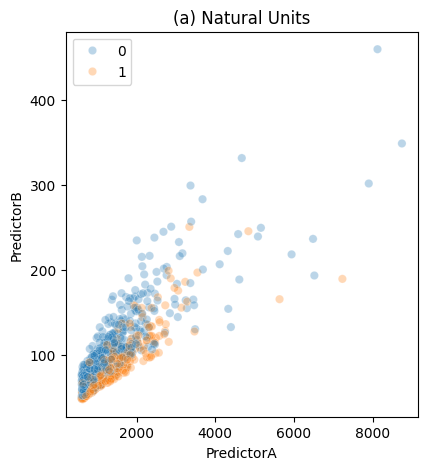

In [144]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=train, x="PredictorA", y="PredictorB", hue="Class", alpha=0.3, palette="tab10")
plt.title("(a) Natural Units")
plt.legend(loc='upper left')
plt.show()

In [145]:
pt = PowerTransformer(method='box-cox')
X_train_trans = pd.DataFrame(pt.fit_transform(X_train), columns=X_train.columns)
X_test_trans = pd.DataFrame(pt.transform(X_test), columns=X_test.columns)
X_train_trans, X_test_trans

(      PredictorA  PredictorB
 0       1.802651    1.527460
 1       1.010670    0.184129
 2       0.314559    0.675991
 3      -0.041142   -0.522488
 4      -0.020825   -0.279933
 ...          ...         ...
 1004    1.010670   -0.017793
 1005    2.030182    1.994848
 1006   -0.944317   -0.251264
 1007    0.345079    0.782580
 1008    1.045060    0.497062
 
 [1009 rows x 2 columns],
       PredictorA  PredictorB
 0      -0.981371   -0.518464
 1       0.209627    0.250771
 2      -1.221149   -2.018158
 3      -1.137712   -1.926725
 4      -0.093310    0.364619
 ...          ...         ...
 1005    1.949432    1.820521
 1006    1.547817    0.773669
 1007    1.486806    1.779017
 1008   -0.673400   -0.042590
 1009    0.843936    0.099387
 
 [1010 rows x 2 columns])

In [146]:
trans_model = LogisticRegression()
trans_model.fit(X_train_trans, y_train);

In [147]:
trans_probs = trans_model.predict_proba(X_test_trans)[:, 1]

In [148]:
trans_fpr, trans_tpr, _ = roc_curve(y_test, trans_probs)
trans_roc_auc = roc_auc_score(y_test, trans_probs)

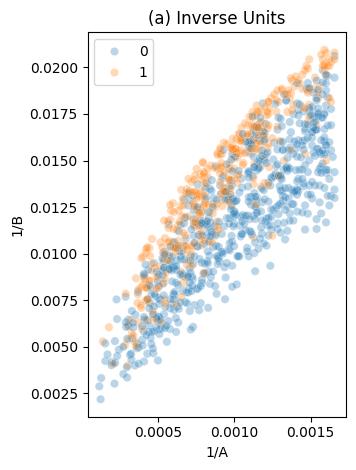

In [149]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=1/X_train["PredictorA"], y=1/X_train["PredictorB"], hue=y_train, alpha=0.3, palette="tab10")
plt.title("(a) Inverse Units")
plt.xlabel("1/A")
plt.ylabel("1/B")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

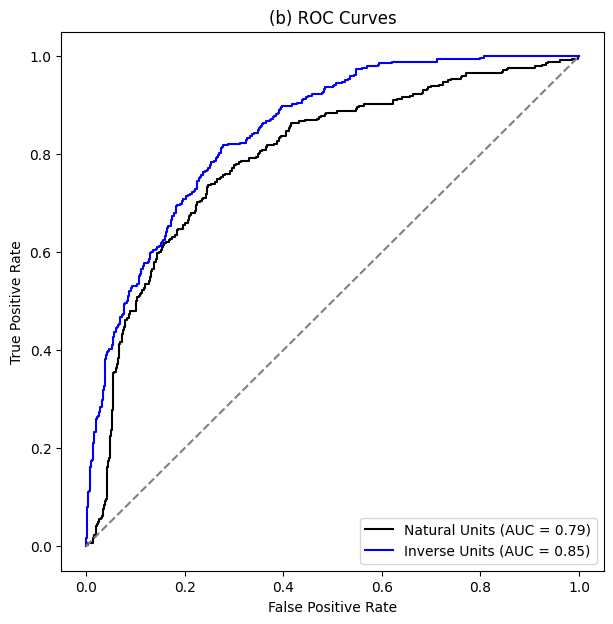

In [150]:
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, label=f"Natural Units (AUC = {roc_auc:.2f})", color="black")
plt.plot(trans_fpr, trans_tpr, label=f"Inverse Units (AUC = {trans_roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("(b) ROC Curves")
plt.legend(loc='lower right')
plt.show()